Import Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load data

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [83]:
df.shape

(4177, 9)

In [84]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [85]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [87]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [88]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

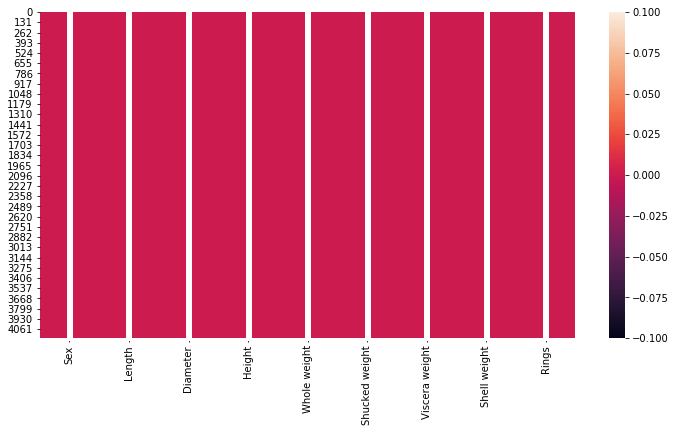

In [89]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),annot=True)

There is no missing values in the dataset

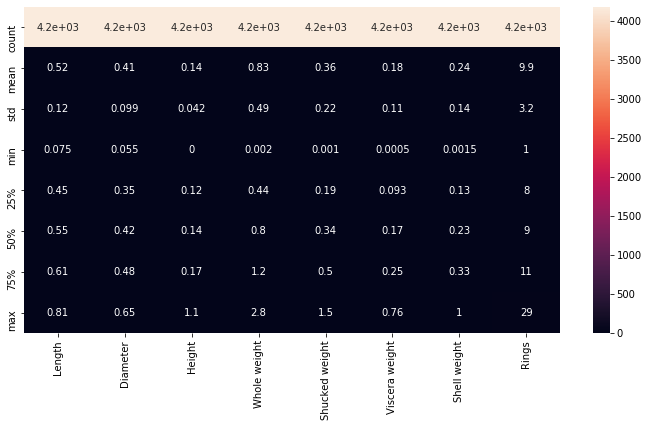

In [90]:
plt.figure(figsize=(12,6))
sns.heatmap(df.describe(),annot=True)

Now explore the target variable

In [91]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

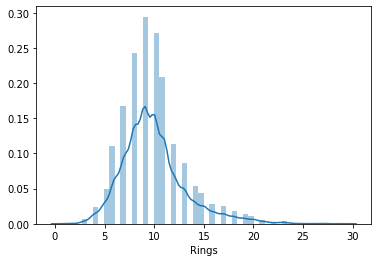

In [92]:
sns.distplot(df['Rings'])

Now explore the feature variables which we are going to use in the model.

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


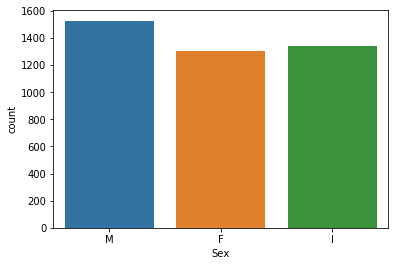

In [93]:
print(df['Sex'].value_counts())
sns.countplot(df['Sex'])

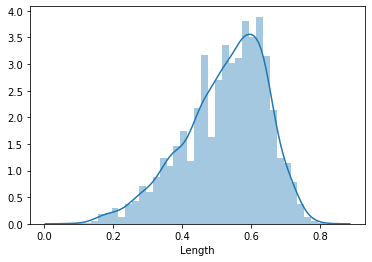

In [94]:
sns.distplot(df['Length'])

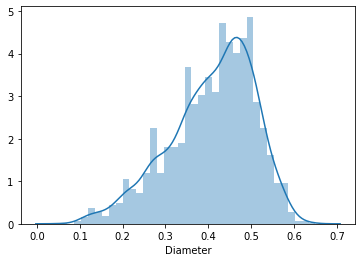

In [95]:
sns.distplot(df['Diameter'])

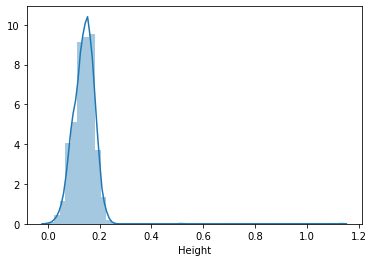

In [96]:
sns.distplot(df['Height'])

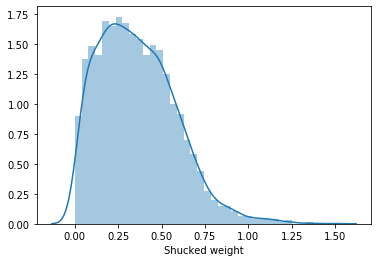

In [97]:
sns.distplot(df['Shucked weight'])

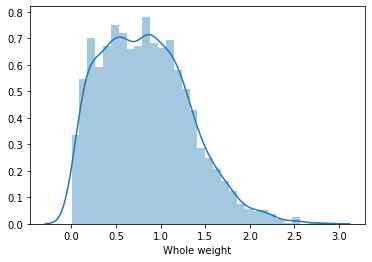

In [98]:
sns.distplot(df['Whole weight'])

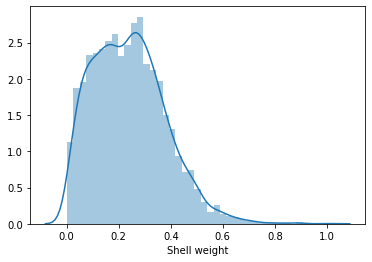

In [99]:
sns.distplot(df['Shell weight'])

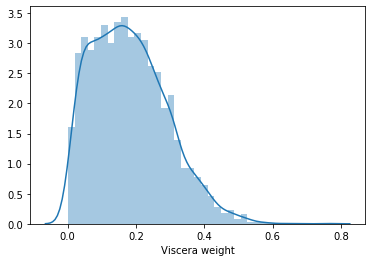

In [100]:
sns.distplot(df['Viscera weight'])

In [101]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Encoding

In [102]:
from sklearn.preprocessing import OneHotEncoder

In [103]:
oh = OneHotEncoder()

In [104]:
en = pd.DataFrame(oh.fit_transform(df[['Sex']]).toarray())

en

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
4172,1.0,0.0,0.0
4173,0.0,0.0,1.0
4174,0.0,0.0,1.0
4175,1.0,0.0,0.0


In [105]:
df = df.join(en)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,0,1,2
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.0,0.0,1.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.0,0.0,1.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1.0,0.0,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.0,0.0,1.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1.0,0.0,0.0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.0,0.0,1.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.0,0.0,1.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1.0,0.0,0.0


In [106]:
df = df.drop(['Sex'],axis=1)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,0,1,2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0


Outliers

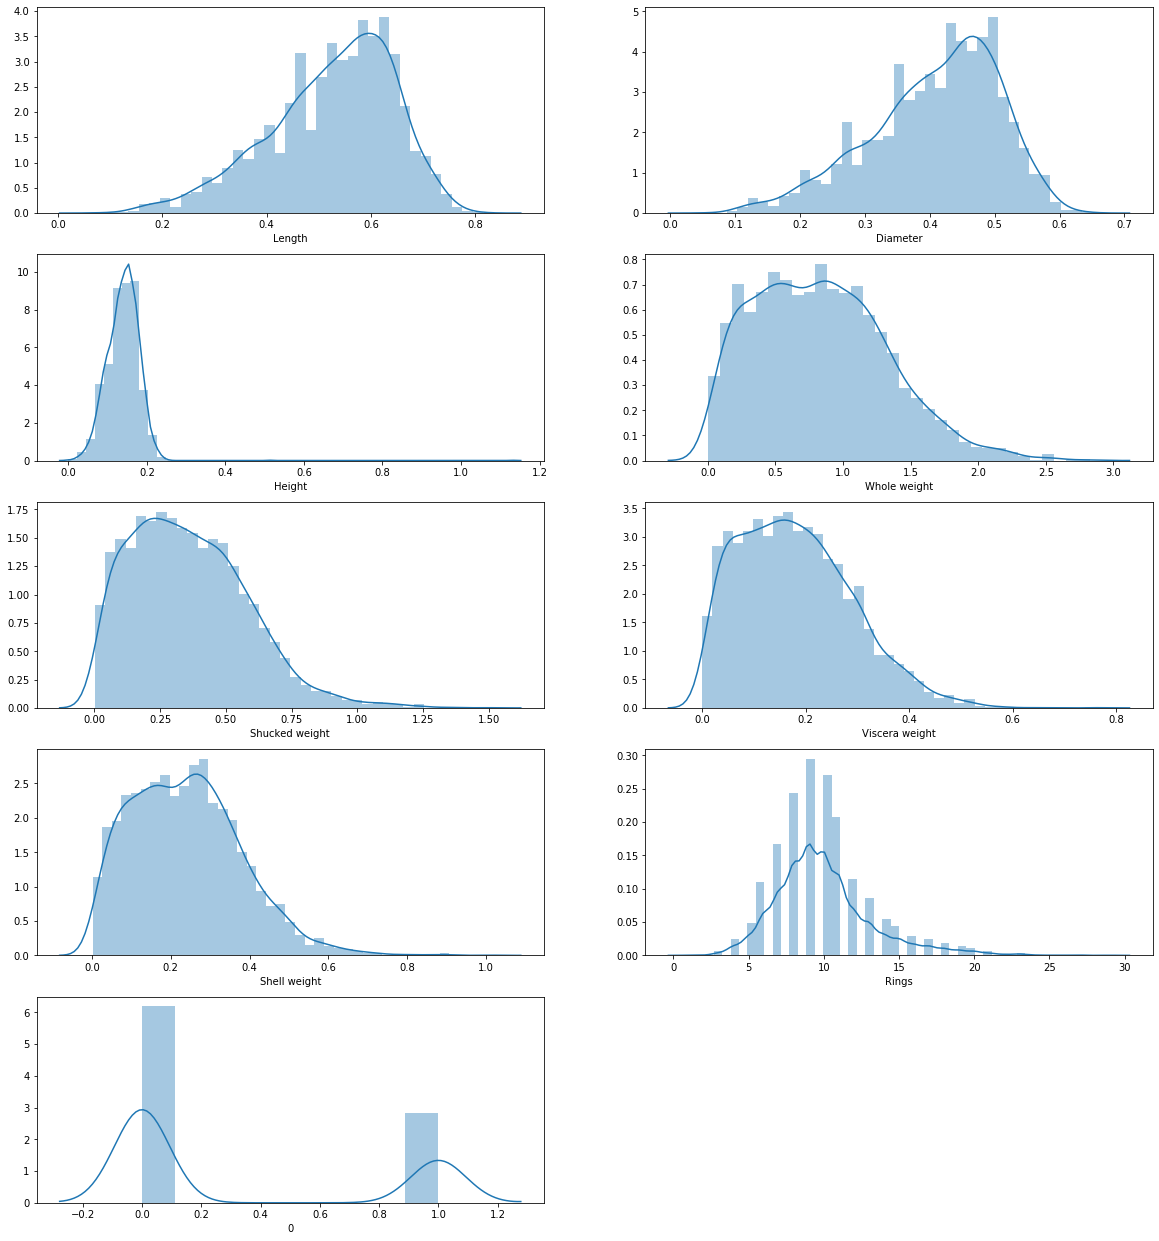

In [107]:
plt.figure(figsize=(20,22))
plot = 1
for i in df:
    if plot < 10:
        ax = plt.subplot(5,2,plot)
        sns.distplot(df[i])
    plot += 1
plt.show()

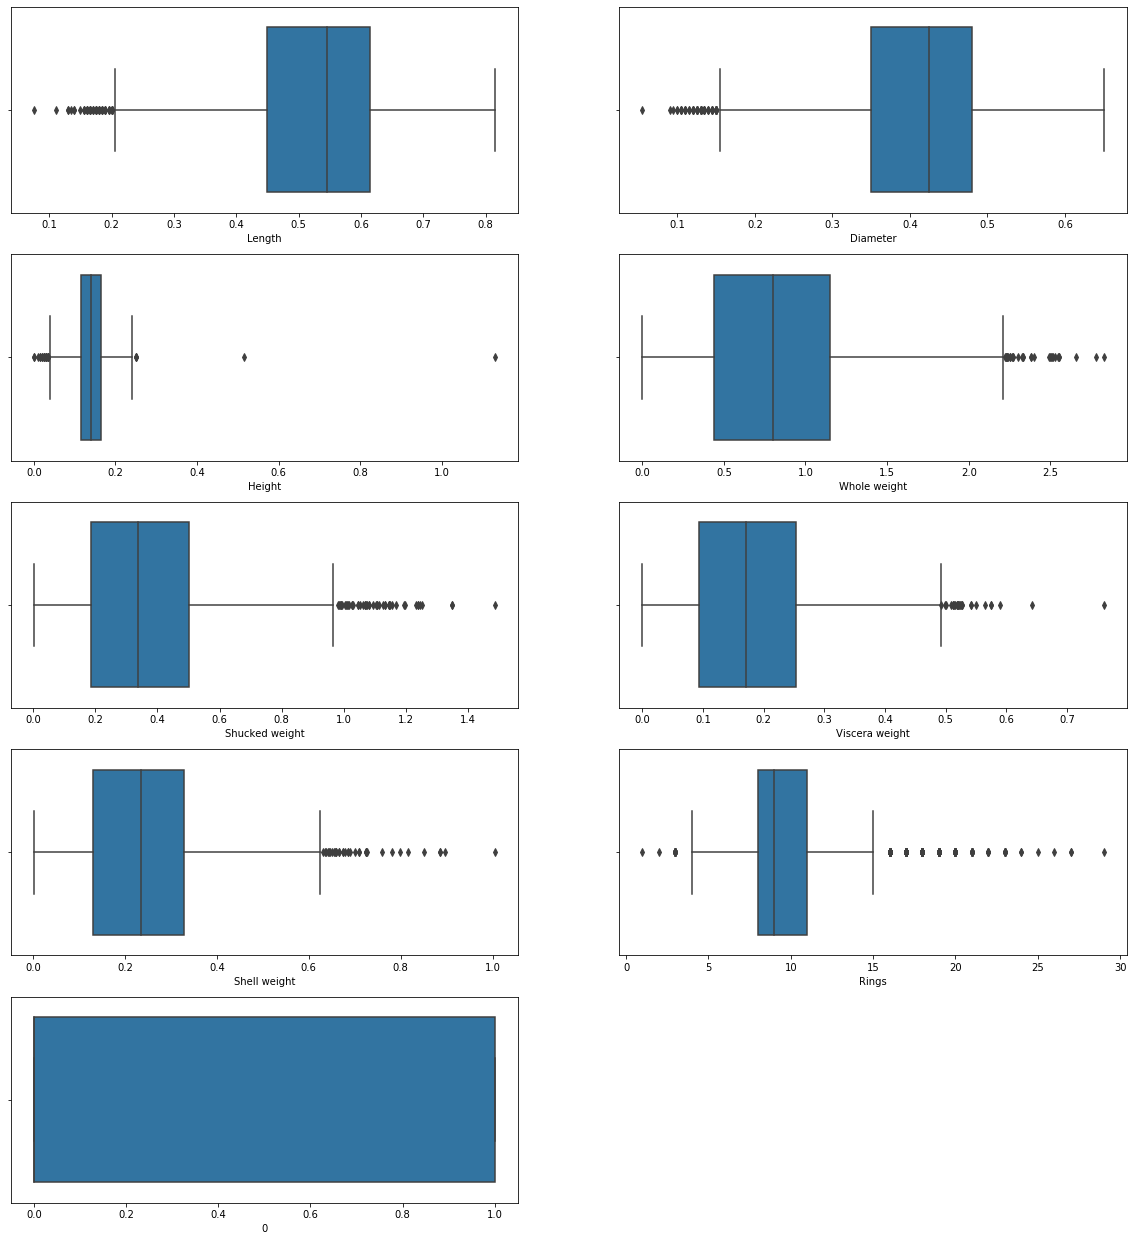

In [108]:
plt.figure(figsize=(20,22))
plot = 1
for i in df:
    if plot < 10:
        ax = plt.subplot(5,2,plot)
        sns.boxplot(df[i])
    plot += 1
plt.show()

LENGTH

In [109]:
print(df['Length'].quantile(0.10))
print(df['Length'].quantile(0.90))

0.355
0.66


In [110]:
df['Length'] = np.where(df['Length'] < 0.355,0.355,df['Length'])

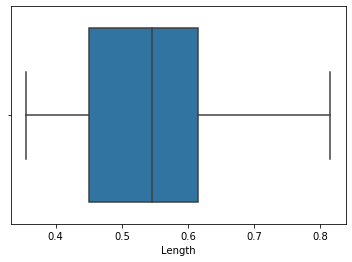

In [111]:
sns.boxplot(df['Length'])

DIAMETER

In [112]:
print(df['Diameter'].quantile(0.10))
print(df['Diameter'].quantile(0.90))

0.265
0.5220000000000005


In [113]:
df['Diameter'] = np.where(df['Diameter'] < 0.265,0.265,df['Diameter'])

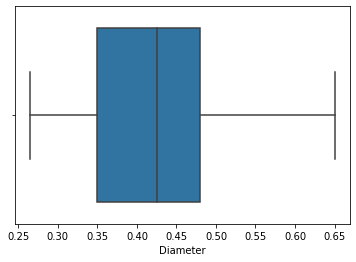

In [114]:
sns.boxplot(df['Diameter'])

HEIGHT

In [115]:
print(df['Height'].quantile(0.10))
print(df['Height'].quantile(0.90))

0.09
0.185


In [116]:
df['Height'] = np.where(df['Height'] < 0.09,0.09,df['Height'])
df['Height'] = np.where(df['Height'] > 0.185,0.185,df['Height'])

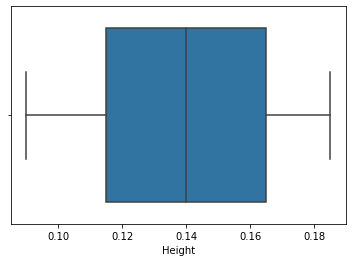

In [117]:
sns.boxplot(df['Height'])

WHOLE WEIGHT

In [118]:
print(df['Whole weight'].quantile(0.10))
print(df['Whole weight'].quantile(0.90))

0.205
1.4782000000000002


In [119]:
df['Whole weight'] = np.where(df['Whole weight'] > 1.4782000000000002,1.4782000000000002,df['Whole weight'])

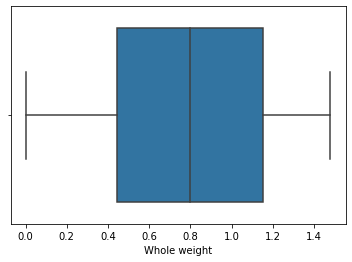

In [120]:
sns.boxplot(df['Whole weight'])

SHUCKED WEIGHT

In [121]:
print(df['Shucked weight'].quantile(0.10))
print(df['Shucked weight'].quantile(0.90))

0.0865
0.647


In [122]:
df['Shucked weight'] = np.where(df['Shucked weight'] > 0.647,0.647,df['Shucked weight'])

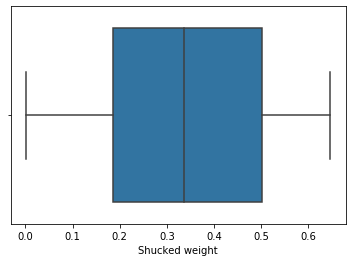

In [123]:
sns.boxplot(df['Shucked weight'])

VISCERA WEIGHT

In [124]:
print(df['Viscera weight'].quantile(0.10))
print(df['Viscera weight'].quantile(0.90))

0.043300000000000005
0.326


In [125]:
df['Viscera weight'] = np.where(df['Viscera weight'] > 0.326,0.326,df['Viscera weight'])

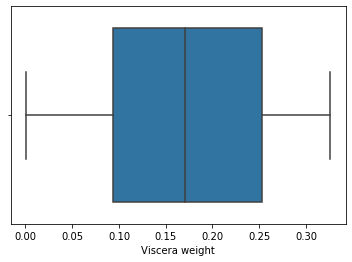

In [126]:
sns.boxplot(df['Viscera weight'])

SHELL WEIGHT

In [127]:
print(df['Shell weight'].quantile(0.10))
print(df['Shell weight'].quantile(0.90))

0.065
0.42000000000000004


In [128]:
df['Shell weight'] = np.where(df['Shell weight'] > 0.42000000000000004,0.42000000000000004,df['Shell weight'])

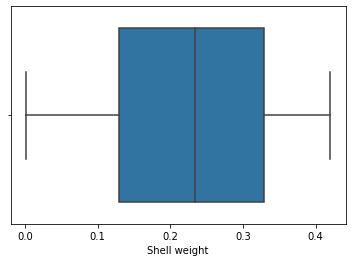

In [129]:
sns.boxplot(df['Shell weight'])

RINGS

In [130]:
print(df['Rings'].quantile(0.10))
print(df['Rings'].quantile(0.90))

6.0
14.0


In [131]:
df['Rings'] = np.where(df['Rings'] < 6.0,6.0,df['Rings'])
df['Rings'] = np.where(df['Rings'] > 14.0,14.0,df['Rings'])

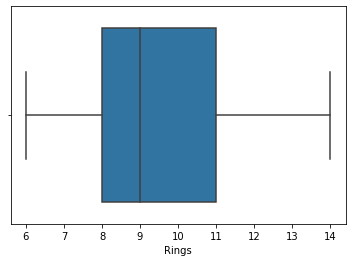

In [132]:
sns.boxplot(df['Rings'])

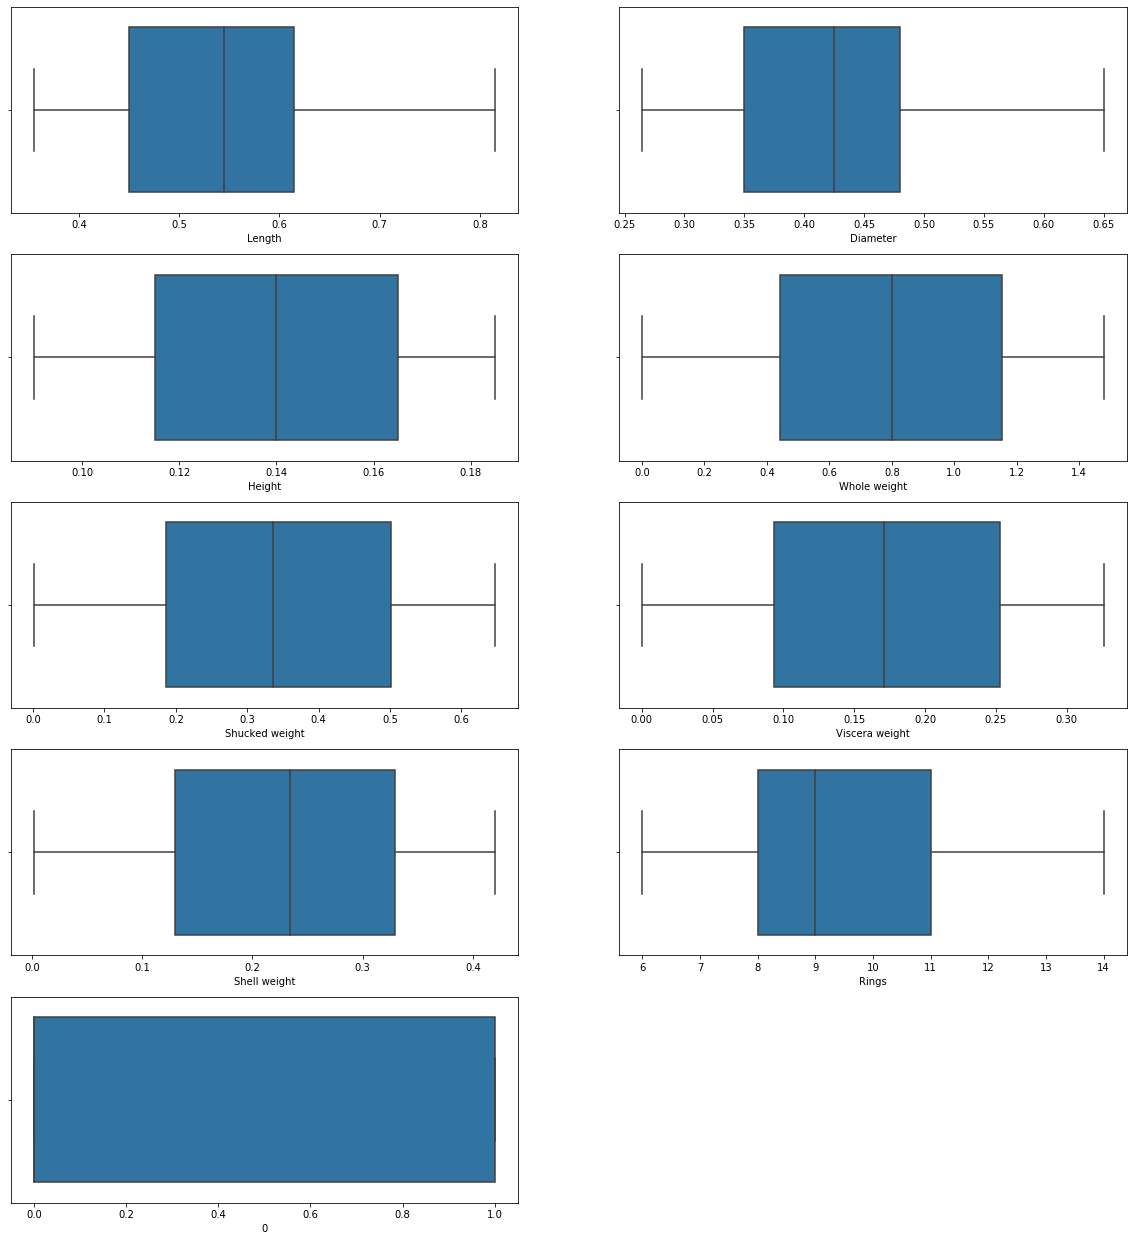

In [133]:
plt.figure(figsize=(20,22))
plot = 1
for i in df:
    if plot < 10:
        ax = plt.subplot(5,2,plot)
        sns.boxplot(df[i])
    plot += 1
plt.show()

In [134]:
df.skew()

Length           -0.164826
Diameter         -0.180160
Height           -0.155393
Whole weight      0.022650
Shucked weight    0.074747
Viscera weight    0.071012
Shell weight     -0.000264
Rings             0.273346
0                 0.807302
1                 0.765708
2                 0.557390
dtype: float64

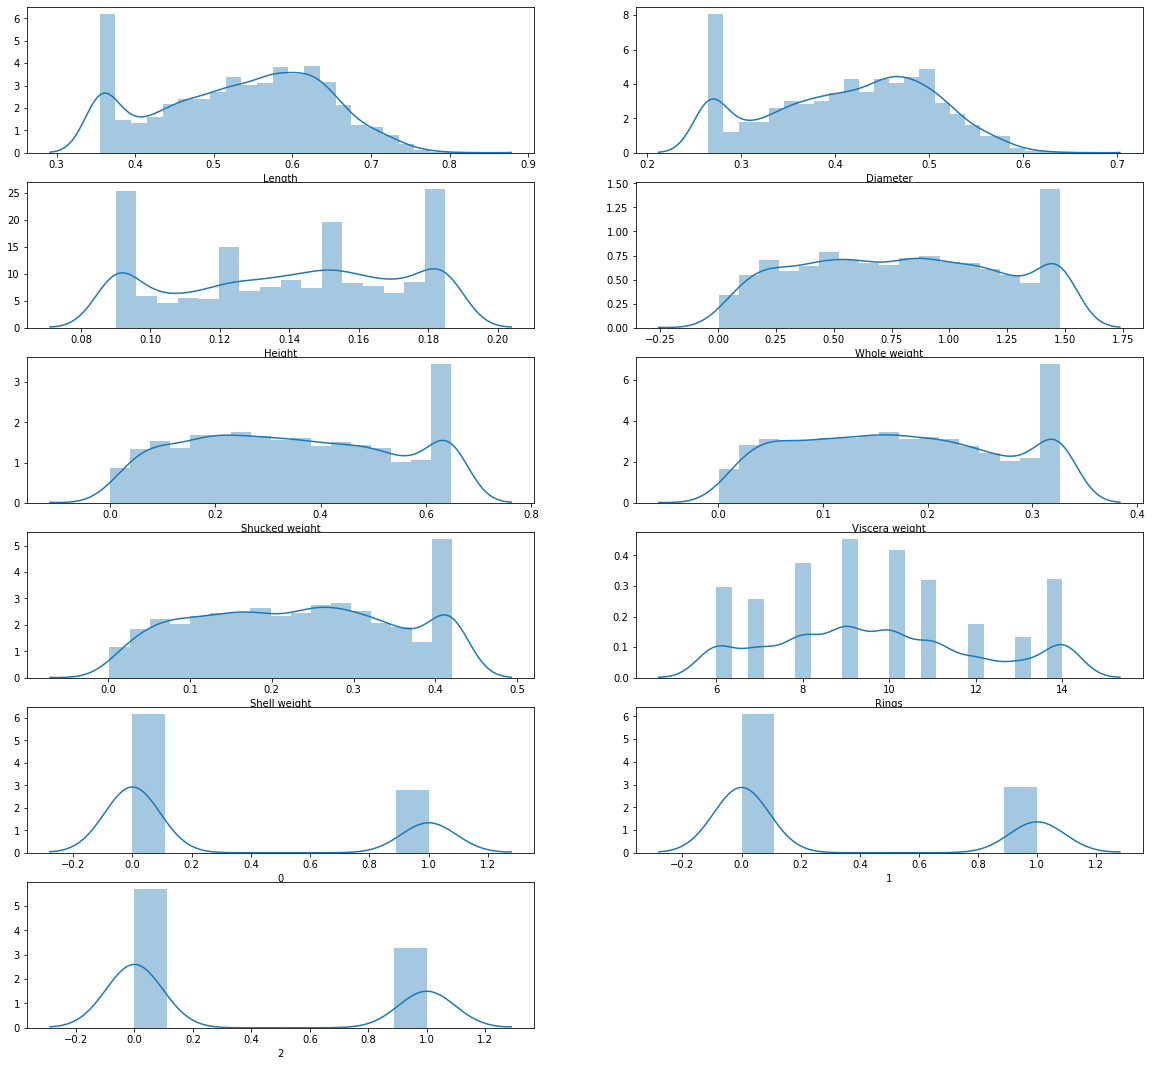

In [135]:
plt.figure(figsize=(20,22))
plot = 1
for i in df:
    if plot < 14:
        ax = plt.subplot(7,2,plot)
        sns.distplot(df[i])
    plot += 1
plt.show()

In [137]:
df.skew()

Length           -0.164826
Diameter         -0.180160
Height           -0.155393
Whole weight      0.022650
Shucked weight    0.074747
Viscera weight    0.071012
Shell weight     -0.000264
Rings             0.273346
0                 0.807302
1                 0.765708
2                 0.557390
dtype: float64

In [138]:
df_corr = df.corr()
df_corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,0,1,2
Length,1.000000,0.984751,0.894133,0.964208,0.946098,0.943626,0.943414,0.585310,0.309042,-0.554218,0.239813
Diameter,0.984751,1.000000,0.900476,0.962556,0.939711,0.939003,0.948891,0.606028,0.318965,-0.567861,0.243486
Height,0.894133,0.900476,1.000000,0.913230,0.869882,0.896327,0.919045,0.635864,0.324074,-0.569265,0.239930
Whole weight,0.964208,0.962556,0.913230,1.000000,0.975031,0.972848,0.967877,0.600418,0.321310,-0.588115,0.260866
Shucked weight,0.946098,0.939711,0.869882,0.975031,1.000000,0.942484,0.913100,0.499942,0.291731,-0.554625,0.256872
Viscera weight,0.943626,0.939003,0.896327,0.972848,0.942484,1.000000,0.933950,0.578700,0.329809,-0.588002,0.252574
Shell weight,0.943414,0.948891,0.919045,0.967877,0.913100,0.933950,1.000000,0.667208,0.324689,-0.581371,0.251075
Rings,0.585310,0.606028,0.635864,0.600418,0.499942,0.578700,0.667208,1.000000,0.272209,-0.485037,0.208199
0,0.309042,0.318965,0.324074,0.321310,0.291731,0.329809,0.324689,0.272209,1.000000,-0.464298,-0.512528
1,-0.554218,-0.567861,-0.569265,-0.588115,-0.554625,-0.588002,-0.581371,-0.485037,-0.464298,1.000000,-0.522541


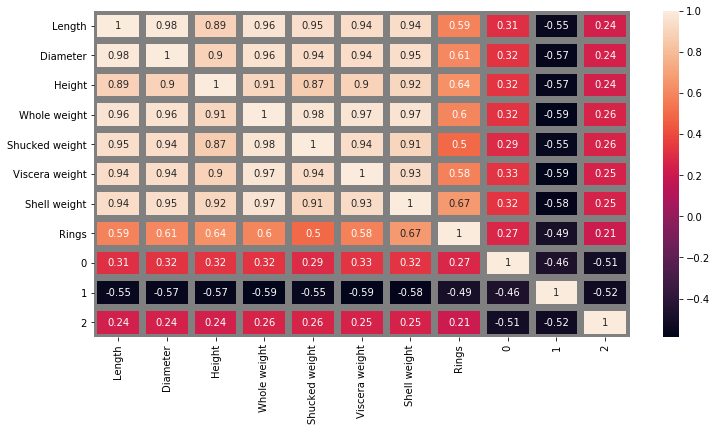

In [139]:
plt.figure(figsize=(12,6))
sns.heatmap(df_corr,annot=True,linecolor='grey',linewidths=6)

In [140]:
X = df.drop(['Rings'],axis=1)
Y = df['Rings']

In [141]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,0,1,2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.355,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.355,0.265,0.090,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


In [142]:
Y.head()

0    14.0
1     7.0
2     9.0
3    10.0
4     7.0
Name: Rings, dtype: float64

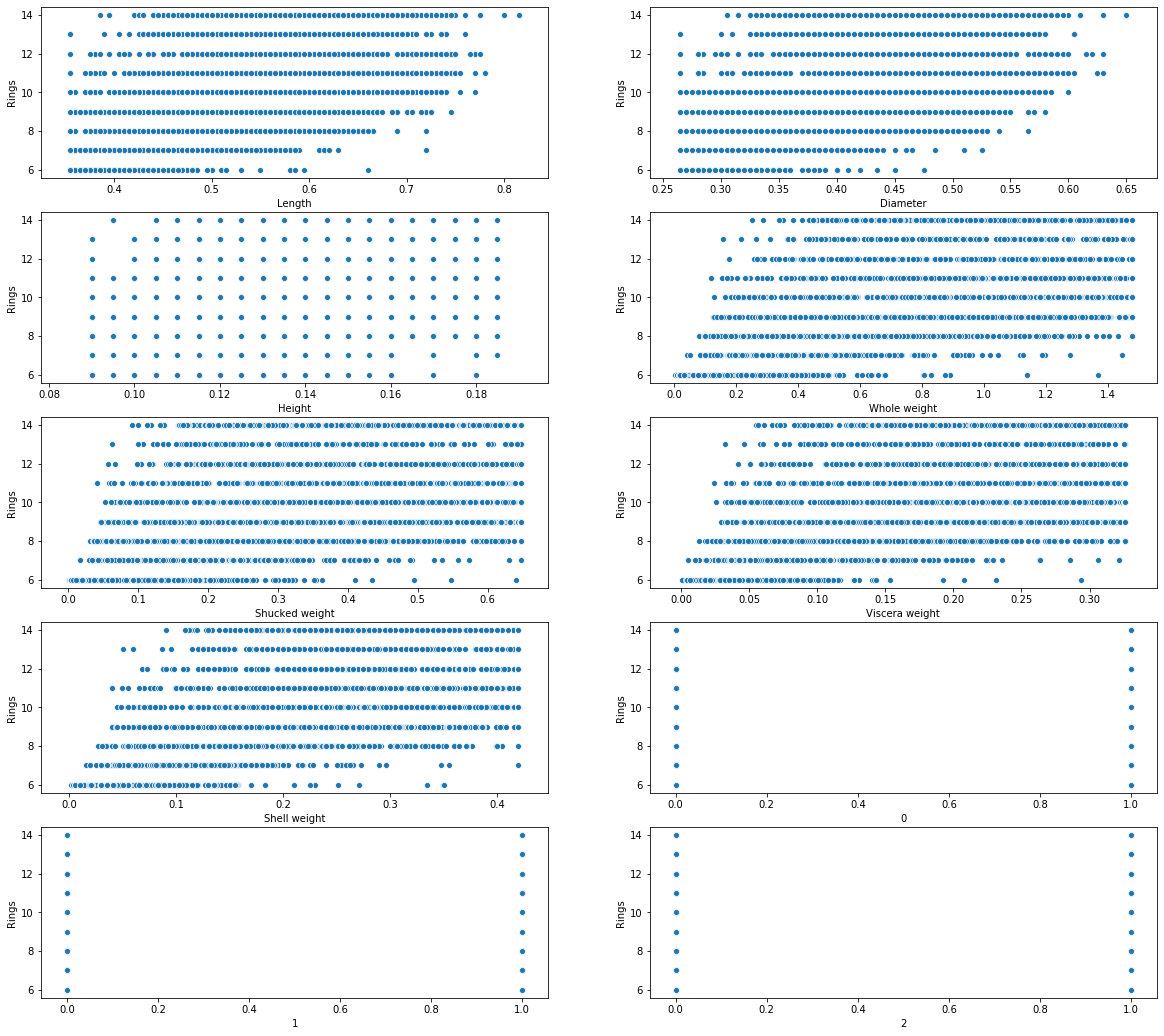

In [144]:
plt.figure(figsize=(20,22))
plot = 1
for i in X:
    if plot < 12:
        ax = plt.subplot(6,2,plot)
        sns.scatterplot(X[i],Y)
    plot += 1
plt.show()

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.72141201, -0.5481798 , -1.41657021, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-1.66922611, -1.68258838, -1.57502062, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-0.01055144,  0.07574493, -0.14896691, ...,  1.48184628,
        -0.68801788, -0.75948762],
       ...,
       [ 0.65291843,  0.69966965,  1.43553722, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.88987196,  0.81311051,  0.32638433, ...,  1.48184628,
        -0.68801788, -0.75948762],
       [ 1.69551394,  1.60719651,  1.43553722, ..., -0.67483383,
        -0.68801788,  1.31667716]])

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [147]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif.sort_values(by='vif',ascending=False)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,Features
7,inf,0
8,inf,1
9,inf,2
3,122.033509,Whole weight
0,39.282666,Length
1,38.349703,Diameter
4,33.032793,Shucked weight
6,28.725603,Shell weight
5,21.138110,Viscera weight
2,7.099197,Height


MODEL BUILDING

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LINEAR REGRESSION

In [149]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    a=r2_score(y_test,y_pred)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  59.358086786936184 found on random state 177


In [150]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=177)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr_acc = r2_score(y_test,y_pred)*100
print(lr_acc)

59.358086786936184


DECISION TREE

In [151]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=i)
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    y_pred_1=dt.predict(x_test)
    a=r2_score(y_test,y_pred_1)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  29.580725279076358 found on random state 1


In [152]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=1)
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_1=dt.predict(x_test)
dt_accu = r2_score(y_test,y_pred_1)*100
print(dt_accu)

28.74612037667401


RANDOM FOREST

In [153]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_pred_2=rf.predict(x_test)
    a=r2_score(y_test,y_pred_2)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  62.6910183019858 found on random state 13


In [154]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=13)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_2=rf.predict(x_test)
rf_accu = r2_score(y_test,y_pred_2)*100
print(rf_accu)

62.44856711607347


GRADIENT BOOST

In [155]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=i)
    gbt=GradientBoostingRegressor()
    gbt.fit(x_train,y_train)
    y_pred_3=gbt.predict(x_test)
    a=r2_score(y_test,y_pred_3)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  62.85364408347151 found on random state 126


In [156]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=126)
gbt=GradientBoostingRegressor()
gbt.fit(x_train,y_train)
y_pred_3=gbt.predict(x_test)
gbt_accu = r2_score(y_test,y_pred_3)*100
print(gbt_accu)

62.879719560160986


In [157]:
print("Logistic Regression : ",lr_acc)
print("Decision Tree : ",dt_accu)
print("Random Forest : ",rf_accu)
print("Gradient Boost : ",gbt_accu)

Logistic Regression :  59.358086786936184
Decision Tree :  28.74612037667401
Random Forest :  62.44856711607347
Gradient Boost :  62.879719560160986


# Hyperparameter Tuning for Random Forest

In [158]:
from sklearn.model_selection import GridSearchCV

In [161]:
param_grid = {  'bootstrap': [True], 
                'max_depth': [5, 10, None], 
                'max_features': ['auto', 'log2','sqrt'], 
                'n_estimators': [50,100,150,200],
                'min_samples_leaf' : [1,2,3]
             }
gbc=GridSearchCV(rf,param_grid,cv=5,n_jobs=1,verbose=0)
gbc.fit(x_train,y_train)
print(gbc.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 3, 'n_estimators': 150}


In [164]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=13)
rf=RandomForestRegressor(bootstrap= True, max_depth= 10, max_features='log2',min_samples_leaf=3, n_estimators= 150)
rf.fit(x_train,y_train)
y_pred_2=rf.predict(x_test)
rf_accu = r2_score(y_test,y_pred_2)*100
print(rf_accu)

63.275923535560196


Error Rate 

In [169]:
#logistic Regression
lg_mean_err = np.sqrt(mean_squared_error(y_test,y_pred))
lg_mean_err

3.036326315095102

In [170]:
#Decision Tree
dt_mean_err = np.sqrt(mean_squared_error(y_test,y_pred_1))
dt_mean_err

3.5043035742740463

In [171]:
#Gradient Boost
gbt_mean_err = np.sqrt(mean_squared_error(y_test,y_pred_3))
gbt_mean_err

3.0086279464106256

In [172]:
#Random Forest error rate after doing hyperparameter tuning.
rf_mean_squared = np.sqrt(mean_squared_error(y_test,y_pred_2))
rf_mean_squared


1.483267222786031

The error rate in logistic , decision tree , gradient boosting is very high as compared to the rate of error in random forest.

The error rate in random forest is 1.48 which is comparatively less after doing hyperparameter tuning for random forest.